# Import libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.set_style("white")
sns.set_palette('tab10')

# Pull in the benchmark data

In [125]:
dat = pd.read_excel('std_io_bufreader_perf_data.xlsx', engine = 'openpyxl')

FileNotFoundError: [Errno 2] No such file or directory: 'std_io_bufreader_perf_data.xlsx'

## Transform some columns

In [49]:
# Create dur, which will be duration in seconds
dat.loc[:, 'dur_sec'] = dat['Duration [microsec]'] / 1e6
dat.loc[:, 'log10_dur'] = np.log10(dat['Duration [microsec]'])

# Switch to KiB
dat.loc[:, 'buff_kib'] = (dat['Buffer size [B]'] / 1024).astype('int')
dat.loc[:, 'fsize_kib'] = round(dat['File size [B]'] / 1024,3)
dat.loc[:, 'fsize_mib'] = dat['fsize_kib'] / 1024

dat.loc[:, 'log10_bs'] = np.log10(dat['Buffer size [B]'])
dat.loc[:, 'log10_fs'] = np.log10(dat['File size [B]'])

## Convert buffer size to human friendly values

In [64]:
dat.loc[:, 'bs'] = dat.loc[:, 'Buffer size [B]'].replace(
                                                            {
                                                                1024 : '1 KiB',
                                                                8192 : '8 KiB',
                                                                131072 : '128 KiB',
                                                                262144 : '256 KiB',
                                                                524288 : '512 KiB',
                                                                1048576 : '1 MiB',
                                                                8388608 : '8 MiB',
                                                                16777216 : '16 MiB',
                                                                33554432 : '32 MiB'
                                                            }
    
)

# Transform the dataframe for plotting

In [111]:
t_dat_1 = dat[dat['Num Cores'] == 1].melt(id_vars = ['bs', 'log10_fs'], value_vars = ['log10_dur'], value_name = 'log10_dur (mus)')
t_dat_4 = dat[dat['Num Cores'] == 4].melt(id_vars = ['bs', 'log10_fs'], value_vars = ['log10_dur'], value_name = 'log10_dur (mus)')

t_dat_1 = t_dat_1.drop('variable', axis = 1)
t_dat_4 = t_dat_4.drop('variable', axis = 1)

t_dat_1.loc[:, 'log10_fs'] = round(t_dat_1.loc[:, 'log10_fs'],2)
t_dat_4.loc[:, 'log10_fs'] = round(t_dat_4.loc[:, 'log10_fs'],2)

# Plotting

## Single core cat plot

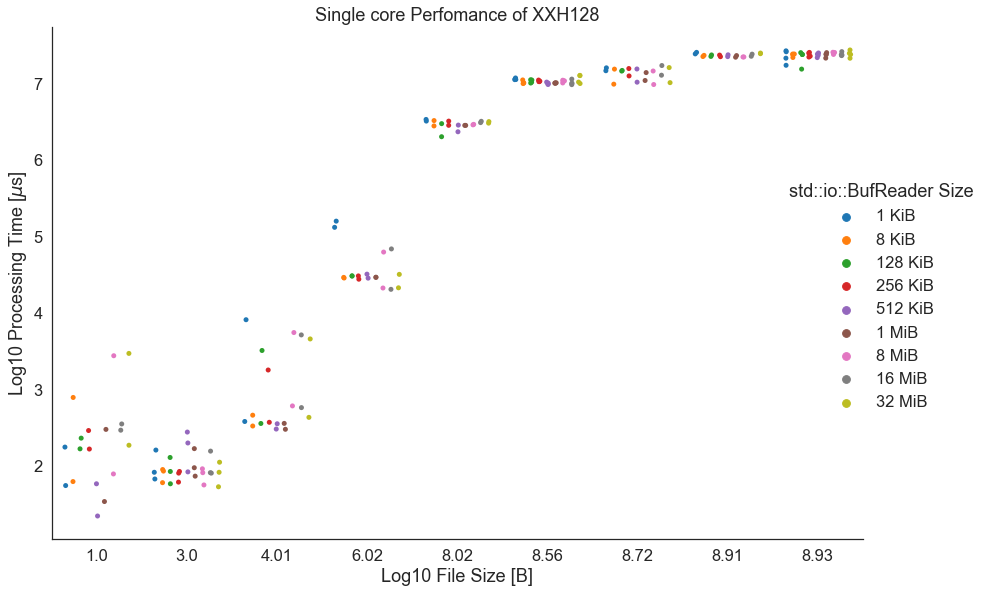

In [121]:
ax = sns.catplot(x = 'log10_fs', y = 'log10_dur (mus)', hue = 'bs', data = t_dat_1,
           height = 8, aspect = 1.5, dodge=True)

ax.set(title = 'Single core Perfomance of XXH128', xlabel = 'Log10 File Size [B]',
       ylabel = r'Log10 Processing Time [$\mu$s]')
ax._legend.set_title('std::io::BufReader Size')
       

## Quad core cat plot

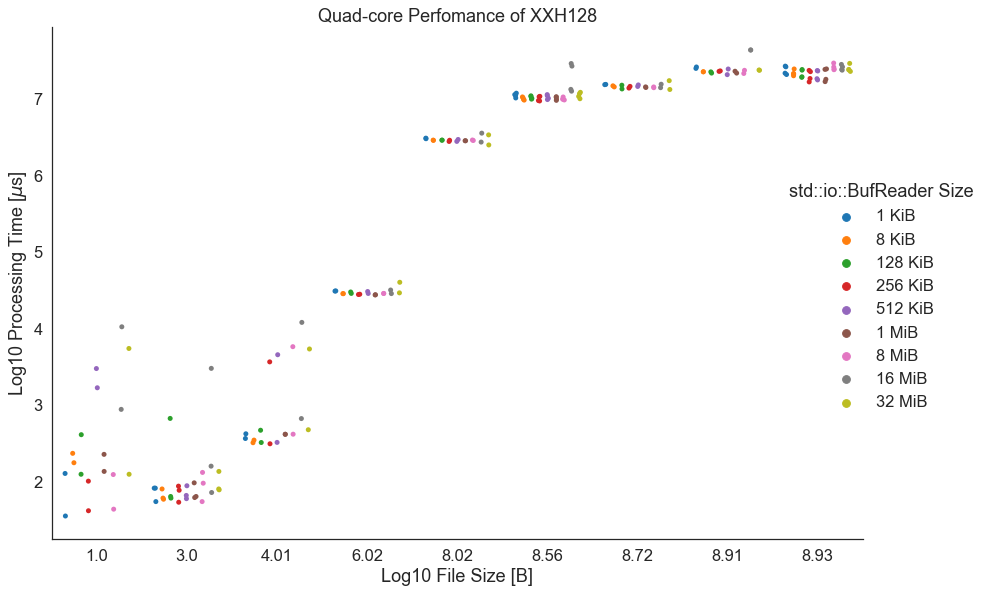

In [120]:
ax = sns.catplot(x = 'log10_fs', y = 'log10_dur (mus)', hue = 'bs', data = t_dat_4,
           height = 8, aspect = 1.5, dodge=True)

ax.set(title = 'Quad-core Perfomance of XXH128', xlabel = 'Log10 File Size [B]',
       ylabel = r'Log10 Processing Time [$\mu$s]')
ax._legend.set_title('std::io::BufReader Size')
       

## Attempt at ridge plot

c:\program files\python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)
c:\program files\python39\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


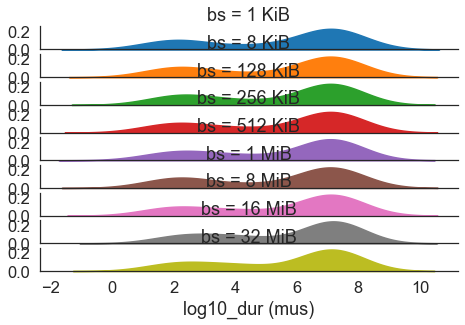

In [85]:
ridge = sns.FacetGrid(t_dat, row="bs", hue="bs", aspect=15, height=.5)

ridge.map(sns.kdeplot, "log10_dur (mus)", clip_on = False, shade = True, alpha = 1, lw = 1.5)


## Single core line plot

<AxesSubplot:xlabel='log10_fs', ylabel='log10_dur'>

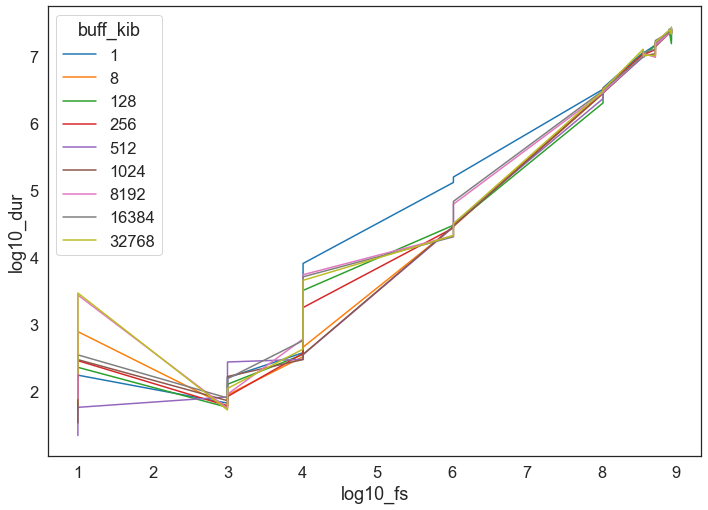

In [62]:
sns.lineplot(x = 'log10_fs', y = 'log10_dur', hue = 'buff_kib', 
                data = dat[dat['Num Cores'] == 1],
            estimator=None, ci=None, 
            palette=sns.color_palette('tab10', n_colors = 9))

## Quad core line plot

<AxesSubplot:xlabel='log10_fs', ylabel='log10_dur'>

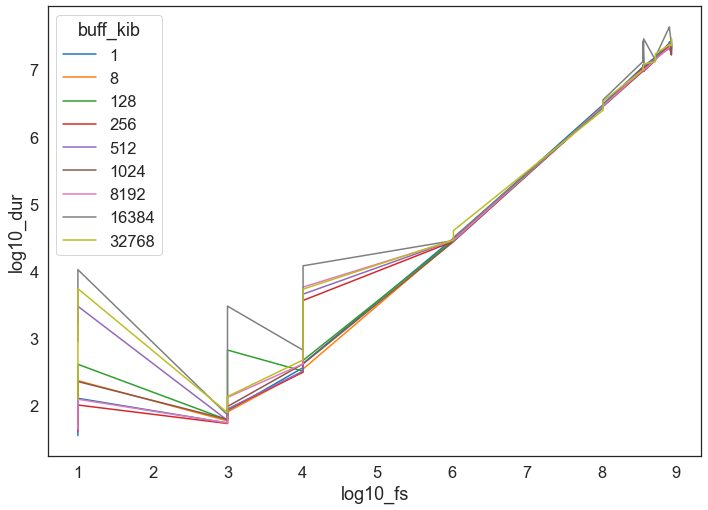

In [124]:
sns.lineplot(x = 'log10_fs', y = 'log10_dur', hue = 'buff_kib', 
            data = dat[dat['Num Cores'] == 4],
            estimator=None, ci=None,
            palette=sns.color_palette('tab10', n_colors = 9))